This library can compute the ECT of a point cloud, a graph and a mesh.

First, we import the necessary dependencies:

In [1]:
import torch 
from dect.directions import generate_2d_directions 
from dect.ect import compute_ect
from dect.ect_fn import scaled_sigmoid 
import matplotlib.pyplot as plt


Compute the ect for a point cloud, that is only vertices (0d-simplices)

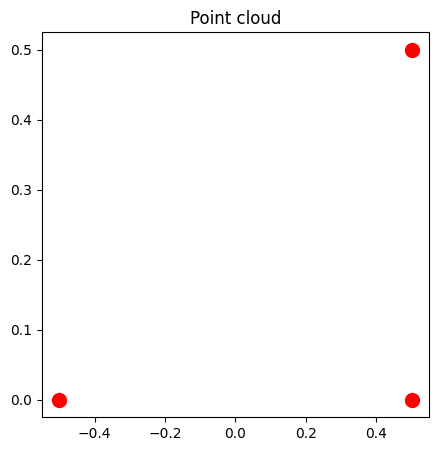

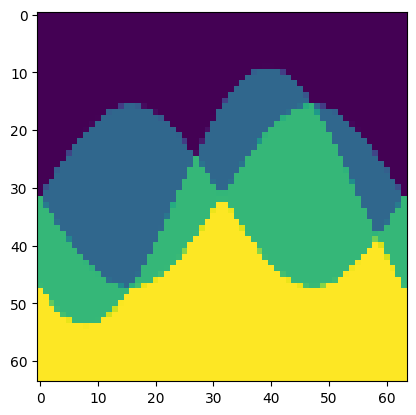

In [18]:
# Basic dataset with three points,three edges and one face.
points_coordinates = torch.tensor([[0.5, 0.0], [-0.5, 0.0], [0.5, 0.5]])

# Convertir a NumPy para graficar con Matplotlib
points_np = points_coordinates.numpy()

x_vals, y_vals = points_np[:, 0], points_np[:, 1]

# Crear la figura
plt.figure(figsize=(5, 5))
plt.scatter(x_vals, y_vals, color='red', marker='o', s=100, label="Puntos")
# Configurar el gráfico
plt.title("Point cloud")
plt.show()

# Generate a set of structured directions along the unit circle.
v = generate_2d_directions(num_thetas=64)

# Compute the ECT.
ect = compute_ect(
    points_coordinates, 
    v=v,
    radius=1,
    resolution=64,
    scale=500,
    ect_fn=scaled_sigmoid
)

# Visualize as an image.
plt.imshow(ect.detach().squeeze().numpy().T)
plt.show()

Now for a graph, that is for a point cloud with vertex and edges (0d and 1d simplices)

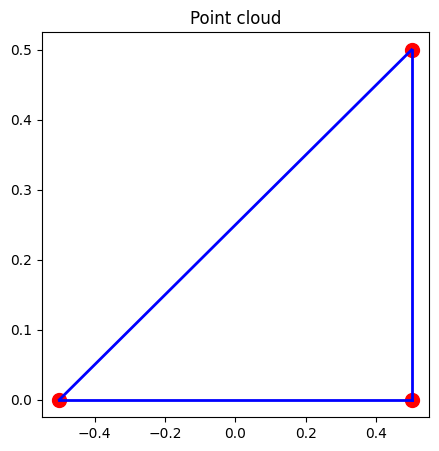

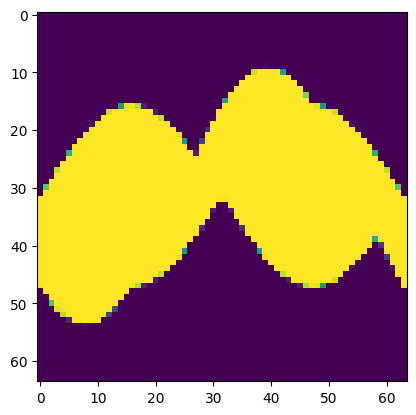

In [16]:
# Basic dataset with three points,three edges and one face.
points_coordinates = torch.tensor([[0.5, 0.0], [-0.5, 0.0], [0.5, 0.5]])
edge_index=torch.tensor([[0, 1, 2], [1, 2, 0]], dtype=torch.long)

# Convertir a NumPy
points_np = points_coordinates.numpy()
edges_np = edge_index.numpy()

# Extraer coordenadas
x_vals, y_vals = points_np[:, 0], points_np[:, 1]

# Crear la figura
plt.figure(figsize=(5, 5))

# Dibujar los puntos
plt.scatter(x_vals, y_vals, color='red', marker='o', s=100, label="Puntos")

# Dibujar las aristas
for i in range(edges_np.shape[1]):
    start, end = edges_np[:, i]
    plt.plot([points_np[start, 0], points_np[end, 0]], 
             [points_np[start, 1], points_np[end, 1]], 'b-', linewidth=2)

plt.title("Point cloud")

# Mostrar la gráfica
plt.show()

# Compute the ECT.
ect = compute_ect(
    points_coordinates, 
    edge_index,
    v=v,
    radius=1,
    resolution=64,
    scale=500,
    ect_fn=scaled_sigmoid
)

# Visualize as an image.
plt.imshow(ect.detach().squeeze().numpy().T)
plt.show()

And for a mesh, that is also for simplicial complexes containing faces (2d-simplices)

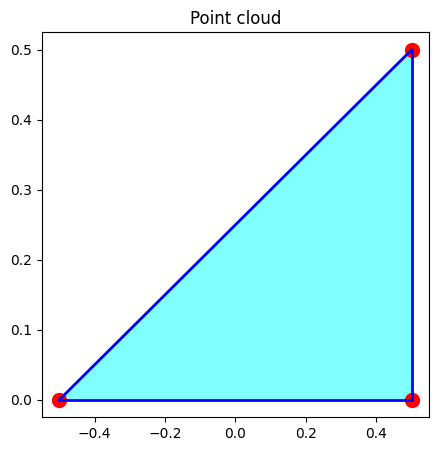

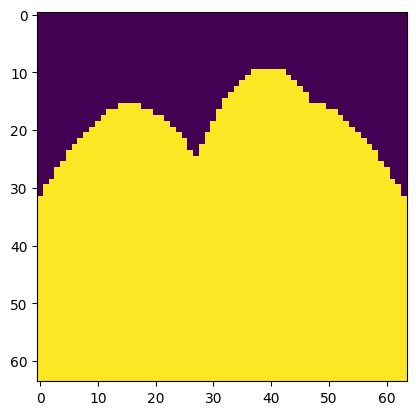

In [15]:
# Basic dataset with three points,three edges and one face.
points_coordinates = torch.tensor([[0.5, 0.0], [-0.5, 0.0], [0.5, 0.5]])
edge_index=torch.tensor([[0, 1, 2], [1, 2, 0]], dtype=torch.long)
face_index=torch.tensor([[0], [1], [2]], dtype=torch.long)

# Convertir a NumPy
points_np = points_coordinates.numpy()
edges_np = edge_index.numpy()
faces_np = face_index.numpy()

# Extraer coordenadas
x_vals, y_vals = points_np[:, 0], points_np[:, 1]

# Crear la figura
plt.figure(figsize=(5, 5))

# Dibujar los triángulos (relleno)
for i in range(faces_np.shape[1]):  # Iterar sobre cada triángulo
    face = faces_np[:, i]
    plt.fill(points_np[face, 0], points_np[face, 1], color='cyan', alpha=0.5, label="Triángulo" if i == 0 else "")

# Dibujar los puntos
plt.scatter(x_vals, y_vals, color='red', marker='o', s=100, label="Puntos")

# Dibujar las aristas
for i in range(edges_np.shape[1]):
    start, end = edges_np[:, i]
    plt.plot([points_np[start, 0], points_np[end, 0]], 
             [points_np[start, 1], points_np[end, 1]], 'b-', linewidth=2)

plt.title("Point cloud")

# Mostrar la gráfica
plt.show()

# Compute the ECT.
ect = compute_ect(
    points_coordinates, 
    edge_index,
    face_index,
    v=v,
    radius=1,
    resolution=64,
    scale=500
)

# Visualize as an image.
plt.imshow(ect.detach().squeeze().numpy().T)
plt.show()